In [41]:
                            #Movie correlation with benefit project

      Reason & summary for the project
  Summary:
  
  The project aims to analyze a dataset of movies and the associated information related to them. The primary approach used in this project is correlation analysis, which involves examining the relationships and dependencies among different factors influencing the various components of movie making.

By utilizing the dataset, the project seeks to identify and understand how different aspects of movie production, such as budget, genre, director, actors, release date, and other relevant variables, correlate with one another. The correlation analysis will help uncover patterns and connections between these factors, allowing for a comprehensive examination of the data and its impact on the different components of movie making.
 
  Reason for making this project:
 
Through this analysis, the project aims to gain insights into which factors have the most significant influence on various aspects of movies. It can potentially reveal relationships between variables, such as how budget affects box office performance, how the choice of actors influences critical reception, or how the genre relates to audience preferences.

Overall, this project leverages a dataset of movies and employs correlation analysis to explore and understand the relationships and effects of different data components on the movie-making process. The findings from this analysis can contribute to better decision-making in the film industry and provide valuable insights for filmmakers, producers, and other stakeholders involved in the movie-making process.
  
  
  

In [42]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of plots we will create

#Read in thr data

df= pd.read_csv('C:/Users/Raju/Desktop/PortFolio Project (DA)/movies.csv')

In [43]:
#looking into data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [44]:
# check if any misssing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [45]:
# data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [46]:
#delete the null or empty value

df.dropna(axis=0, inplace=True)


In [47]:
#change datatype to remove decimal 
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [48]:
# create a new column year from taking first 4 digits from released column

# df['year_corrected'] = df['released'].astype(str).str[:4]

# df

In [49]:
#order the gross value from acending to decending
df.sort_values(by='gross', ascending=False, inplace=True)

In [50]:
#making a scrollbar to see all date as mentioned below(basically removing the limit)
pd.set_option('display.max_rows', None)
#df

In [66]:
# drop the duplicates if present
df.drop_duplicates()

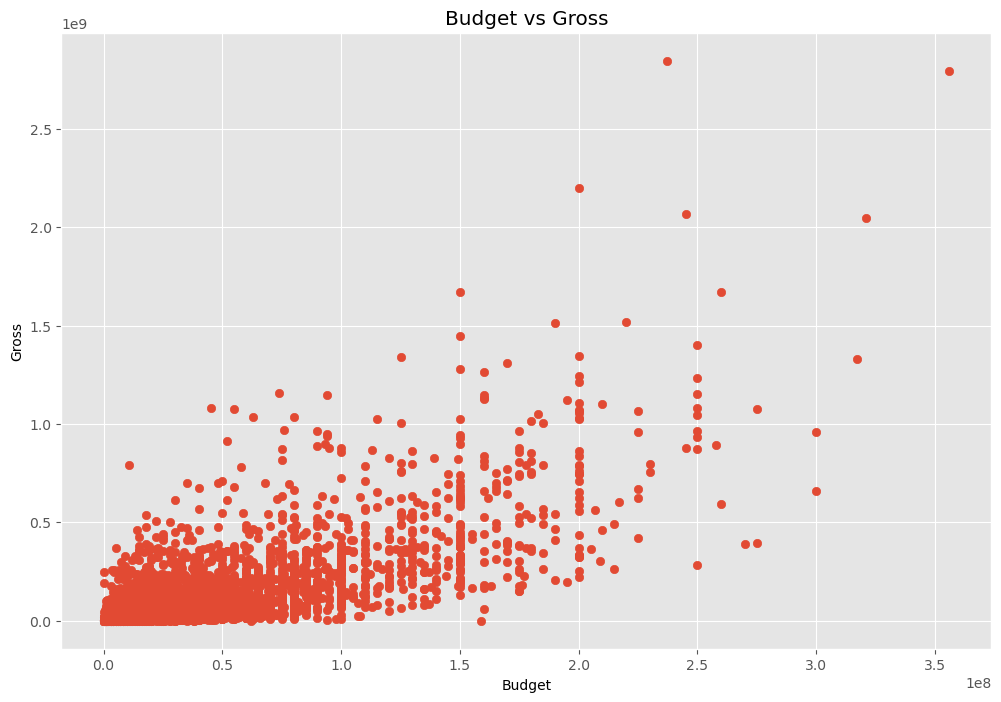

In [52]:
#scatter plot with budget vs gross

# Create a scatter plot of budget vs gross
plt.scatter(df['budget'], df['gross'])

# Set plot labels and title
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross')

plt.show()
 

[]

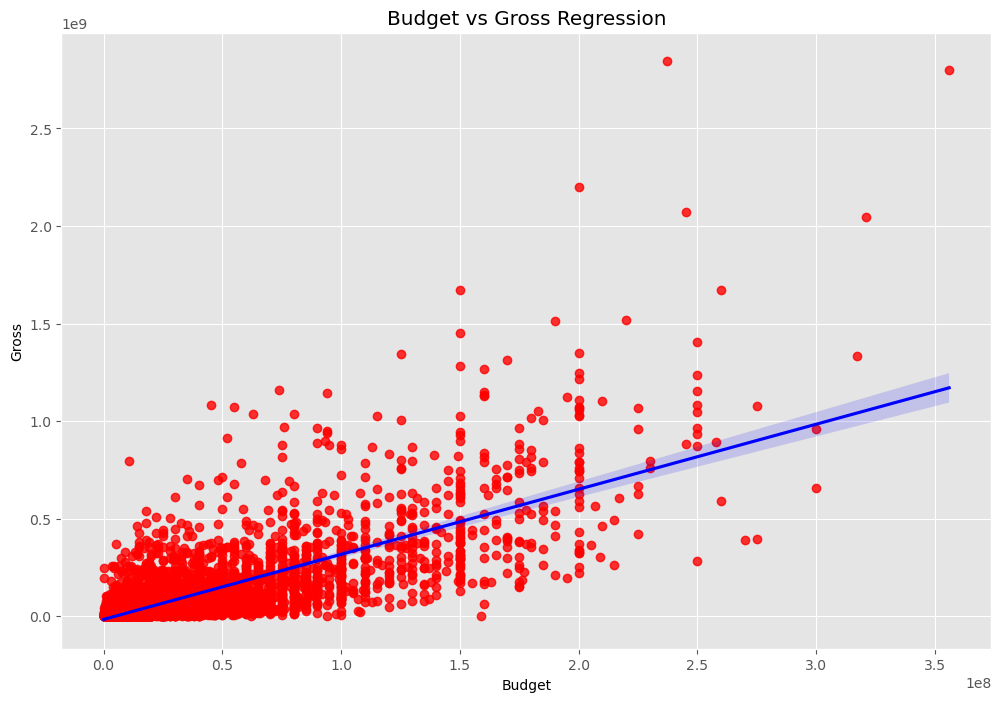

In [53]:

# Create a regression plot of budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, color='red', line_kws={'color': 'blue'})

# Set plot labels and title
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross Regression')

plt.plot()

# Correlation and correllation matrix

*Just a personal note to understand*


                                   Correlation
Correlation is a way to understand how two or more things are related. It helps us determine if changes in one thing are linked to changes in another thing. 

Imagine you have two friends, and you want to see if there is a relationship between their heights and their weights. If they have a positive correlation, it means that as one friend gets taller, they also tend to get heavier. On the other hand, if they have a negative correlation, it means that as one friend gets taller, they tend to get lighter. If there is no correlation, it means that there is no consistent pattern between their heights and weights.


                                   Correlation matrix
  A correlation matrix is like a table that shows the relationships between many different things. Instead of just comparing two friends like in the previous example, a correlation matrix allows us to compare the relationships between multiple variables. It provides a complete picture of how different things are related to each other.

For example, let's say we have a dataset with variables like age, income, and education level. A correlation matrix would show us how age relates to income, how age relates to education level, how income relates to education level, and so on. This can help us understand if there are any connections or patterns among these variables.

                    Whats the use of correlation and correlation matrix in analysis?
  By using correlation and correlation matrices, we can analyze data and discover how different factors are connected, which can be helpful in making predictions or understanding relationships in various fields like finance, science, or social sciences.

In [54]:
#start correlation besically now we are seeing correlation between gross and budget

df.corr(method='pearson') 

#types of correlation
#pearson
#kendail
#spearman

C:\Users\Raju\AppData\Local\Temp\ipykernel_8700\2039973157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\Raju\AppData\Local\Temp\ipykernel_8700\1557989552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


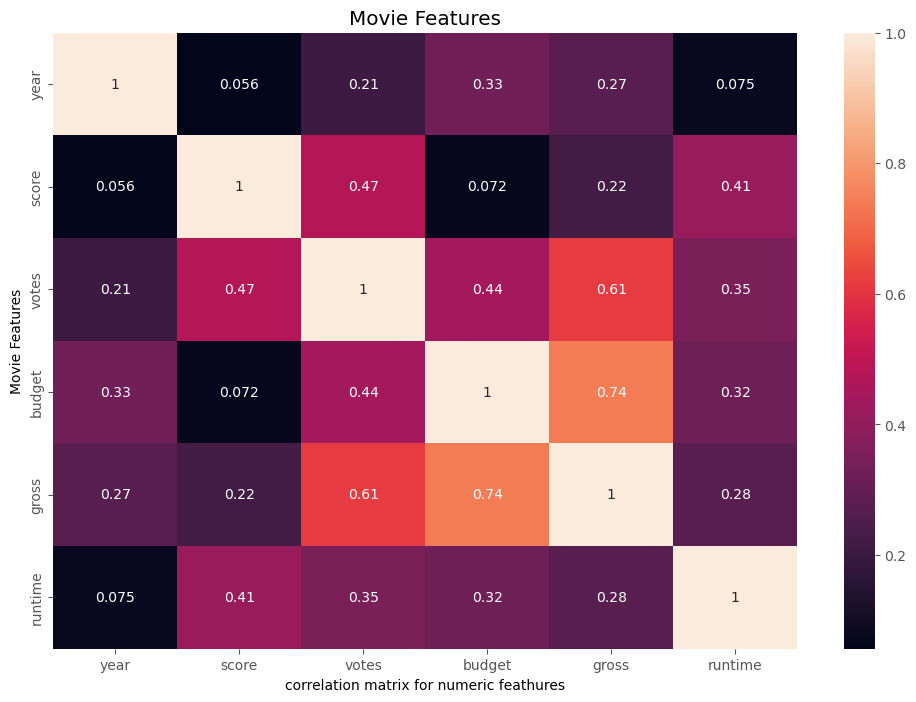

In [55]:
#vishualize the correlation
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
# Set plot labels and title
plt.xlabel('correlation matrix for numeric feathures')
plt.ylabel('Movie Features')
plt.title('Movie Features')
plt.show()

In [56]:
#lets do correlation with everyting including non numeric

#step 1 
#create give non numeric a cotogerised value

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


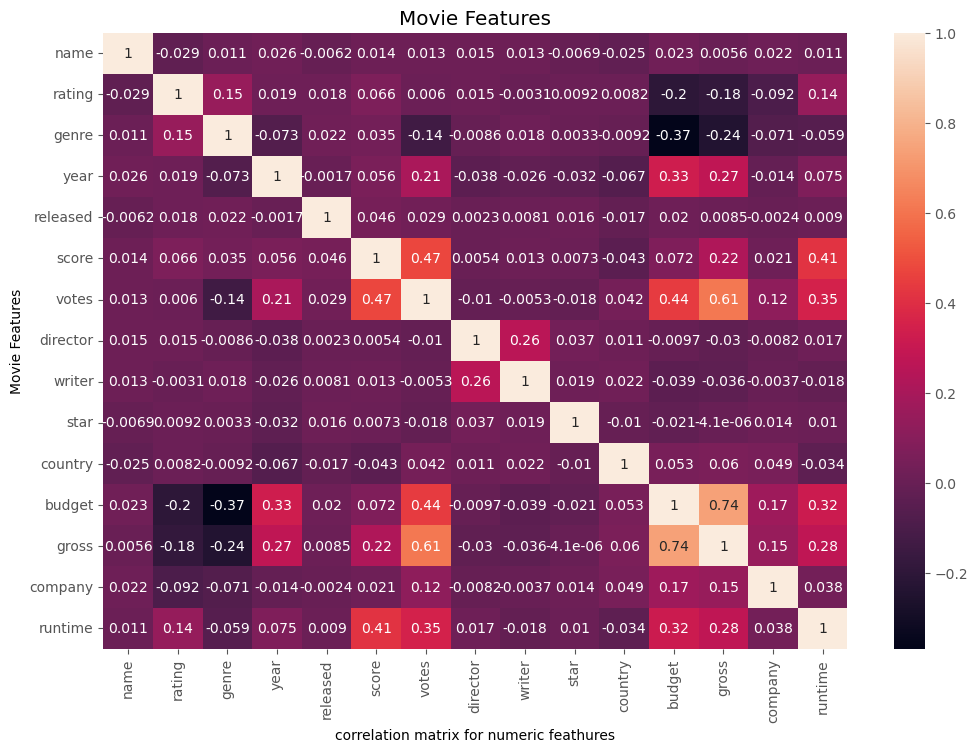

In [57]:
# vishualize everything
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
# Set plot labels and title
plt.xlabel('correlation matrix for numeric feathures')
plt.ylabel('Movie Features')
plt.title('Movie Features')
plt.show()

In [60]:
#vishualise as matrix

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [62]:
#make it by group for better understanding
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [63]:
#looking for specific requirement(here we are checking what two are more correlated with eachother)
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [64]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [65]:
#now look at the above output and determine what you need from it
#I personally will look at what are the factors in place for making a successful movie with good profit

                                       by Dhanraj 

What is understood by the above result?

Votes and budget are directly influencing the Gross of the movie ,

in simple terms movies which have high profit had high voting and cost of production was high aswell